# Capstone Project 1: MuscleHub AB Test

## Step 1: Get started with SQL

Like most businesses, Janet keeps her data in a SQL database.  Normally, you'd download the data from her database to a csv file, and then load it into a Jupyter Notebook using Pandas.

For this project, you'll have to access SQL in a slightly different way.  You'll be using a special Codecademy library that lets you type SQL queries directly into this Jupyter notebook.  You'll have pass each SQL query as an argument to a function called `sql_query`.  Each query will return a Pandas DataFrame.  Here's an example:

In [15]:
# This import only needs to happen once, at the beginning of the notebook
from codecademySQL import sql_query

In [16]:
# Here's an example of a query that just displays some data
sql_query(
SELECT *
FROM visits)

SyntaxError: invalid syntax (<ipython-input-16-87669b442168>, line 4)

In [17]:
# Here's an example where we save the data to a DataFrame
df = sql_query('''
SELECT *
FROM applications
LIMIT 5
''')

## Step 2: Get your dataset

Let's get started!

Janet of MuscleHub has a SQLite database, which contains several tables that will be helpful to you in this investigation:
- `visits` contains information about potential gym customers who have visited MuscleHub
- `fitness_tests` contains information about potential customers in "Group A", who were given a fitness test
- `applications` contains information about any potential customers (both "Group A" and "Group B") who filled out an application.  Not everyone in `visits` will have filled out an application.
- `purchases` contains information about customers who purchased a membership to MuscleHub.

Use the space below to examine each table.

In [18]:
# Examine visits here
visits = sql_query('''SELECT *
               FROM visits''')
print(visits)

      index first_name   last_name                          email  gender  \
0         0      Karen     Manning        Karen.Manning@gmail.com  female   
1         1    Annette       Boone               AB9982@gmail.com  female   
2         2   Salvador     Merritt  SalvadorMerritt12@outlook.com    male   
3         3     Martha     Maxwell       Martha.Maxwell@gmail.com  female   
4         4      Andre       Mayer         AndreMayer90@gmail.com    male   
5         5     Herman     Ratliff         HRatliff1977@gmail.com    male   
6         6     Steven      Conrad       StevenConrad27@gmail.com    male   
7         7      Shane     Lindsey        Shane.Lindsey@gmail.com    male   
8         8       Luis      Landry         LuisLandry78@gmail.com    male   
9         9    Carolyn    Garrison     Carolyn.Garrison@gmail.com  female   
10       10        Jay     Winters         JayWinters12@gmail.com    male   
11       11     Willie       Moses        WillieMoses86@gmail.com    male   

In [19]:
# Examine fitness_tests here
fitness = sql_query('''SELECT *
               FROM fitness_tests''')
print(fitness)

      index first_name   last_name                         email  gender  \
0         0        Kim      Walter         KimWalter58@gmail.com  female   
1         1        Tom     Webster              TW3857@gmail.com    male   
2         2     Marcus       Bauer        Marcus.Bauer@gmail.com    male   
3         3    Roberta        Best            RB6305@hotmail.com  female   
4         4     Carrie     Francis            CF1896@hotmail.com  female   
5         5     Teresa       Yates          TYates1988@gmail.com  female   
6         6   Salvador    Cardenas       SCardenas1980@gmail.com    male   
7         7    Valerie       Munoz          VMunoz1998@gmail.com  female   
8         8     Jeremy        Howe           JHowe1982@gmail.com    male   
9         9       Joel       Combs              JC9481@gmail.com    male   
10       10      Nancy       Morin         Nancy.Morin@gmail.com  female   
11       11   Lorraine     Lindsay              LL3161@gmail.com  female   
12       12 

In [20]:
# Examine applications here
appls = sql_query('''SELECT *
               FROM applications''')
print(appls)

     index first_name  last_name                          email  gender  \
0        0        Roy     Abbott          RoyAbbott32@gmail.com    male   
1        1      Agnes    Acevedo        AgnesAcevedo1@gmail.com  female   
2        2    Roberta    Acevedo               RA8063@gmail.com  female   
3        3     Darren     Acosta        DAcosta1996@hotmail.com    male   
4        4     Vernon     Acosta          VAcosta1975@gmail.com    male   
5        5        Ray     Adkins          RAdkins1997@gmail.com    male   
6        6       Dawn     Adkins          Dawn.Adkins@gmail.com  female   
7        7       Anna    Aguilar               AA9306@gmail.com  female   
8        8    Michele     Albert               MA7730@gmail.com  female   
9        9       Joel   Alvarado               JA8797@gmail.com    male   
10      10     Cheryl     Ashley          CAshley1996@gmail.com  female   
11      11    Roberta     Atkins       Roberta.Atkins@gmail.com  female   
12      12     Ashley    

In [21]:
# Examine purchases here
purchases = sql_query('''SELECT *
               FROM purchases''')
print(purchases)

     index first_name  last_name                          email  gender  \
0        0        Roy     Abbott          RoyAbbott32@gmail.com    male   
1        1    Roberta    Acevedo               RA8063@gmail.com  female   
2        2     Vernon     Acosta          VAcosta1975@gmail.com    male   
3        3     Darren     Acosta        DAcosta1996@hotmail.com    male   
4        4       Dawn     Adkins          Dawn.Adkins@gmail.com  female   
5        5        Ray     Adkins          RAdkins1997@gmail.com    male   
6        6       Anna    Aguilar               AA9306@gmail.com  female   
7        7    Michele     Albert               MA7730@gmail.com  female   
8        8       Joel   Alvarado               JA8797@gmail.com    male   
9        9     Cheryl     Ashley          CAshley1996@gmail.com  female   
10      10    Roberta     Atkins       Roberta.Atkins@gmail.com  female   
11      11     Ashley      Avila           AAvila1987@gmail.com  female   
12      12     Sylvia    

We'd like to download a giant DataFrame containing all of this data.  You'll need to write a query that does the following things:

1. Not all visits in  `visits` occurred during the A/B test.  You'll only want to pull data where `visit_date` is on or after `7-1-17`.

2. You'll want to perform a series of `LEFT JOIN` commands to combine the four tables that we care about.  You'll need to perform the joins on `first_name`, `last_name`, and `email`.  Pull the following columns:


- `visits.first_name`
- `visits.last_name`
- `visits.gender`
- `visits.email`
- `visits.visit_date`
- `fitness_tests.fitness_test_date`
- `applications.application_date`
- `purchases.purchase_date`

Save the result of this query to a variable called `df`.

Hint: your result should have 5004 rows.  Does it?

In [22]:
df = sql_query('''WITH t1 AS(
SELECT visits.first_name, visits.last_name, visits.gender, visits.email, visits.visit_date, fitness_tests.fitness_test_date
FROM visits
LEFT JOIN fitness_tests
ON visits.first_name = fitness_tests.first_name AND 
visits.last_name = fitness_tests.last_name AND
visits.email = fitness_tests.email), 

t2 AS(
SELECT t1.first_name, t1.last_name, t1.gender, t1.email, t1.visit_date, t1.fitness_test_date, applications.application_date
FROM t1
LEFT JOIN applications
ON t1.first_name = applications.first_name AND 
t1.last_name = applications.last_name AND
t1.email = applications.email),

t3 AS(
SELECT t2.first_name, t2.last_name, t2.gender, t2.email, t2.visit_date, t2.fitness_test_date, t2.application_date, purchases.purchase_date
FROM t2
LEFT JOIN purchases
ON t2.first_name = purchases.first_name AND 
t2.last_name = purchases.last_name AND
t2.email = purchases.email)
SELECT *
FROM t3
WHERE visit_date >= '7-1-17'
''')
print(df)


     first_name   last_name  gender                          email visit_date  \
0           Kim      Walter  female          KimWalter58@gmail.com     7-1-17   
1           Tom     Webster    male               TW3857@gmail.com     7-1-17   
2        Edward       Bowen    male         Edward.Bowen@gmail.com     7-1-17   
3        Marcus       Bauer    male         Marcus.Bauer@gmail.com     7-1-17   
4       Roberta        Best  female             RB6305@hotmail.com     7-1-17   
5        Joseph       Foley    male        JosephFoley81@gmail.com     7-1-17   
6        Carrie     Francis  female             CF1896@hotmail.com     7-1-17   
7        Sharon     William  female     Sharon.William@outlook.com     7-1-17   
8        Teresa       Yates  female           TYates1988@gmail.com     7-1-17   
9      Salvador    Cardenas    male        SCardenas1980@gmail.com     7-1-17   
10         Glen      Barker    male          GBarker1976@gmail.com     7-1-17   
11      Valerie       Munoz 

## Step 3: Investigate the A and B groups

We have some data to work with! Import the following modules so that we can start doing analysis:
- `import pandas as pd`
- `from matplotlib import pyplot as plt`

In [23]:
import pandas as pd
from matplotlib import pyplot as plt


We're going to add some columns to `df` to help us with our analysis.

Start by adding a column called `ab_test_group`.  It should be `A` if `fitness_test_date` is not `None`, and `B` if `fitness_test_date` is `None`.

In [24]:
df["ab_test_group"] = df.fitness_test_date.apply(lambda x: "A" if pd.notna(x) else "B")
print(df)

     first_name   last_name  gender                          email visit_date  \
0           Kim      Walter  female          KimWalter58@gmail.com     7-1-17   
1           Tom     Webster    male               TW3857@gmail.com     7-1-17   
2        Edward       Bowen    male         Edward.Bowen@gmail.com     7-1-17   
3        Marcus       Bauer    male         Marcus.Bauer@gmail.com     7-1-17   
4       Roberta        Best  female             RB6305@hotmail.com     7-1-17   
5        Joseph       Foley    male        JosephFoley81@gmail.com     7-1-17   
6        Carrie     Francis  female             CF1896@hotmail.com     7-1-17   
7        Sharon     William  female     Sharon.William@outlook.com     7-1-17   
8        Teresa       Yates  female           TYates1988@gmail.com     7-1-17   
9      Salvador    Cardenas    male        SCardenas1980@gmail.com     7-1-17   
10         Glen      Barker    male          GBarker1976@gmail.com     7-1-17   
11      Valerie       Munoz 

Let's do a quick sanity check that Janet split her visitors such that about half are in A and half are in B.

Start by using `groupby` to count how many users are in each `ab_test_group`.  Save the results to `ab_counts`.

In [25]:
ab_counts = df.groupby("ab_test_group").first_name.count().reset_index
print(ab_counts)

<bound method Series.reset_index of ab_test_group
A    2504
B    2500
Name: first_name, dtype: int64>


We'll want to include this information in our presentation.  Let's create a pie cart using `plt.pie`.  Make sure to include:
- Use `plt.axis('equal')` so that your pie chart looks nice
- Add a legend labeling `A` and `B`
- Use `autopct` to label the percentage of each group
- Save your figure as `ab_test_pie_chart.png`

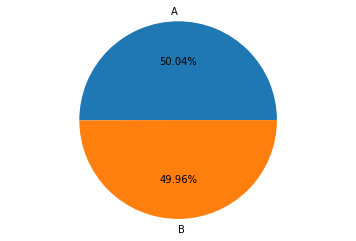

In [26]:
values = [2504,2500]
labelnames= ["A", "B"]
plt.pie(values, labels=labelnames, autopct = "%0.2f%%")
plt.axis("equal")
plt.savefig("ABGroupNums.png")
plt.show()

## Step 4: Who picks up an application?

Recall that the sign-up process for MuscleHub has several steps:
1. Take a fitness test with a personal trainer (only Group A)
2. Fill out an application for the gym
3. Send in their payment for their first month's membership

Let's examine how many people make it to Step 2, filling out an application.

Start by creating a new column in `df` called `is_application` which is `Application` if `application_date` is not `None` and `No Application`, otherwise.

In [27]:
df["is_application"] = df.application_date.apply(lambda x: "Application" if pd.notna(x) else "No Application")
print(df.head(10))

  first_name last_name  gender                       email visit_date  \
0        Kim    Walter  female       KimWalter58@gmail.com     7-1-17   
1        Tom   Webster    male            TW3857@gmail.com     7-1-17   
2     Edward     Bowen    male      Edward.Bowen@gmail.com     7-1-17   
3     Marcus     Bauer    male      Marcus.Bauer@gmail.com     7-1-17   
4    Roberta      Best  female          RB6305@hotmail.com     7-1-17   
5     Joseph     Foley    male     JosephFoley81@gmail.com     7-1-17   
6     Carrie   Francis  female          CF1896@hotmail.com     7-1-17   
7     Sharon   William  female  Sharon.William@outlook.com     7-1-17   
8     Teresa     Yates  female        TYates1988@gmail.com     7-1-17   
9   Salvador  Cardenas    male     SCardenas1980@gmail.com     7-1-17   

  fitness_test_date application_date purchase_date ab_test_group  \
0        2017-07-03             None          None             A   
1        2017-07-02             None          None          

Now, using `groupby`, count how many people from Group A and Group B either do or don't pick up an application.  You'll want to group by `ab_test_group` and `is_application`.  Save this new DataFrame as `app_counts`

In [28]:
app_counts = df.groupby(["ab_test_group", "is_application"]).first_name.count().reset_index().pivot(columns = "is_application", 
      index="ab_test_group",
      values = "first_name").reset_index()

We're going to want to calculate the percent of people in each group who complete an application.  It's going to be much easier to do this if we pivot `app_counts` such that:
- The `index` is `ab_test_group`
- The `columns` are `is_application`
Perform this pivot and save it to the variable `app_pivot`.  Remember to call `reset_index()` at the end of the pivot!

In [29]:
print(app_counts)

is_application ab_test_group  Application  No Application
0                          A          250            2254
1                          B          325            2175


Define a new column called `Total`, which is the sum of `Application` and `No Application`.

In [30]:
app_counts["total"] = app_counts["Application"] + app_counts["No Application"]

Calculate another column called `Percent with Application`, which is equal to `Application` divided by `Total`.

In [31]:
app_counts["percent"] = app_counts["Application"] / app_counts["total"]
print(app_counts)

is_application ab_test_group  Application  No Application  total  percent
0                          A          250            2254   2504  0.09984
1                          B          325            2175   2500  0.13000


It looks like more people from Group B turned in an application.  Why might that be?

We need to know if this difference is statistically significant.

Choose a hypothesis tests, import it from `scipy` and perform it.  Be sure to note the p-value.
Is this result significant?

In [32]:
import scipy.stats as s
contingency = [[app_counts.iat[0,1],app_counts.iat[0,2]],
               [app_counts.iat[1,1],app_counts.iat[1,2]]]
_, pvalue, _, _ = s.chi2_contingency(contingency)
print(contingency)
print(pvalue)
result = "Two groups application percentages are significantly different"

[[250, 2254], [325, 2175]]
0.0009647827600722304


## Step 4: Who purchases a membership?

Of those who picked up an application, how many purchased a membership?

Let's begin by adding a column to `df` called `is_member` which is `Member` if `purchase_date` is not `None`, and `Not Member` otherwise.

In [33]:
df["is_member"] = df.purchase_date.apply(lambda x: "Member" if pd.notna(x) else "Not Member")

Now, let's create a DataFrame called `just_apps` the contains only people who picked up an application.

In [34]:
just_apps = df[df.is_application == "Application"]
print(len(just_apps))

575


Great! Now, let's do a `groupby` to find out how many people in `just_apps` are and aren't members from each group.  Follow the same process that we did in Step 4, including pivoting the data.  You should end up with a DataFrame that looks like this:

|is_member|ab_test_group|Member|Not Member|Total|Percent Purchase|
|-|-|-|-|-|-|
|0|A|?|?|?|?|
|1|B|?|?|?|?|

Save your final DataFrame as `member_pivot`.

In [35]:
member_pivot = just_apps.groupby(["ab_test_group","is_member"]).first_name.count().reset_index().pivot(columns="is_member", 
                                                                                               index="ab_test_group",
                                                                                               values="first_name").reset_index()
member_pivot["percent_member"] = member_pivot["Member"] / (member_pivot["Member"]+member_pivot["Not Member"])
print(member_pivot)

is_member ab_test_group  Member  Not Member  percent_member
0                     A     200          50        0.800000
1                     B     250          75        0.769231


It looks like people who took the fitness test were more likely to purchase a membership **if** they picked up an application.  Why might that be?

Just like before, we need to know if this difference is statistically significant.  Choose a hypothesis tests, import it from `scipy` and perform it.  Be sure to note the p-value.
Is this result significant?

In [36]:
c = [[200,50],[250,75]]
_,pvalue2,_,_ = s.chi2_contingency(c)
print(pvalue2)
result2 = "for the people who picked an application form, purchasing the membershipis data distrubuiton is not significantly different from each other"
print(result2)

0.43258646051083327
for the people who picked an application form, purchasing the membershipis data distrubuiton is not significantly different from each other


Previously, we looked at what percent of people **who picked up applications** purchased memberships.  What we really care about is what percentage of **all visitors** purchased memberships.  Return to `df` and do a `groupby` to find out how many people in `df` are and aren't members from each group.  Follow the same process that we did in Step 4, including pivoting the data.  You should end up with a DataFrame that looks like this:

|is_member|ab_test_group|Member|Not Member|Total|Percent Purchase|
|-|-|-|-|-|-|
|0|A|?|?|?|?|
|1|B|?|?|?|?|

Save your final DataFrame as `final_member_pivot`.

In [37]:
final_member_pivot = df.groupby(["ab_test_group","is_member"]).first_name.count().reset_index().pivot(columns="is_member", 
                                                                                               index="ab_test_group",
                                                                                               values="first_name").reset_index()
final_member_pivot["percent_member"] = final_member_pivot["Member"] / (final_member_pivot["Member"]+final_member_pivot["Not Member"])
print(final_member_pivot)

is_member ab_test_group  Member  Not Member  percent_member
0                     A     200        2304        0.079872
1                     B     250        2250        0.100000


Previously, when we only considered people who had **already picked up an application**, we saw that there was no significant difference in membership between Group A and Group B.

Now, when we consider all people who **visit MuscleHub**, we see that there might be a significant different in memberships between Group A and Group B.  Perform a significance test and check.

In [38]:
c2 = [[200,2304],[250,2250]]
_,pvalue3,_,_ = s.chi2_contingency(c2)
print(pvalue3)
result3 = "for the people who visited muscle hub, purchasing the membershipis are significantly different from each otherlookign at people coming from group A or B"
print(result2)

0.014724114645783203
for the people who picked an application form, purchasing the membershipis data distrubuiton is not significantly different from each other


## Step 5: Summarize the acquisition funel with a chart

We'd like to make a bar chart for Janet that shows the difference between Group A (people who were given the fitness test) and Group B (people who were not given the fitness test) at each state of the process:
- Percent of visitors who apply
- Percent of applicants who purchase a membership
- Percent of visitors who purchase a membership

Create one plot for **each** of the three sets of percentages that you calculated in `app_pivot`, `member_pivot` and `final_member_pivot`.  Each plot should:
- Label the two bars as `Fitness Test` and `No Fitness Test`
- Make sure that the y-axis ticks are expressed as percents (i.e., `5%`)
- Have a title

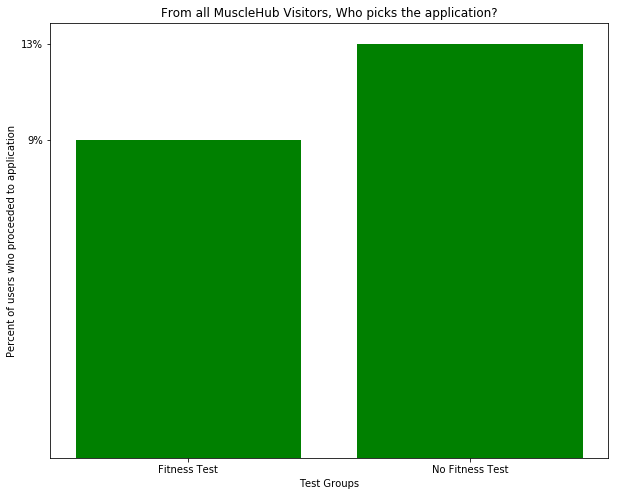

In [50]:
#funnel analysis from visitors to application
xvalues = [1,2]
yvalues = [0.09984, 0.13000]
label = ["Fitness Test", "No Fitness Test"]
plt.figure(figsize = (10,8))
plt.bar(xvalues, yvalues, color = "green")
ax = plt.subplot()
ay = plt.subplot()
ay.set_yticks(yvalues)
ay.set_yticklabels(["9%", "13%"])
ax.set_xticks(xvalues)
ax.set_xticklabels(label)
plt.xlabel("Test Groups")
plt.ylabel("Percent of users who proceeded to application")
plt.title("From all MuscleHub Visitors, Who picks the application?")
plt.savefig("Percentage of Application pickups.png")
plt.show()

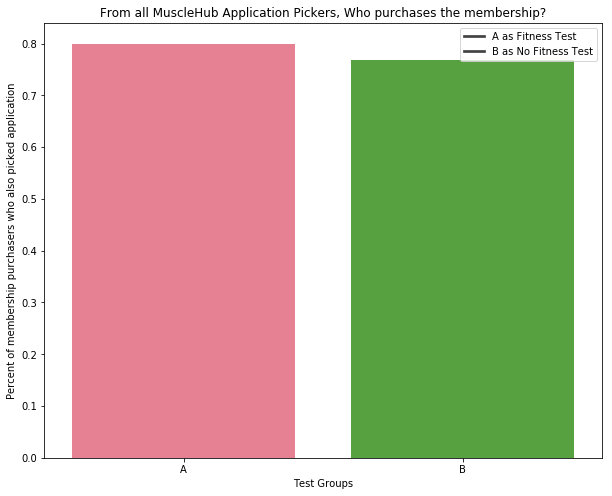

In [47]:
#funnel analysis from application pickers to membership purchasers
import seaborn as sns
plt.figure(figsize = (10,8))
ax1 = plt.subplot()
sns.barplot(data=member_pivot, x="ab_test_group", y="percent_member").set(
    xlabel='Test Groups', 
    ylabel='Percent of membership purchasers who also picked application'
)
plt.title("From all MuscleHub Application Pickers, Who purchases the membership?")
plt.legend(["A as Fitness Test", "B as No Fitness Test"])
sns.set_palette("husl",3)
sns.color_palette("husl")
plt.savefig("Percentage of membership purchase from application pickers.png")
plt.show()


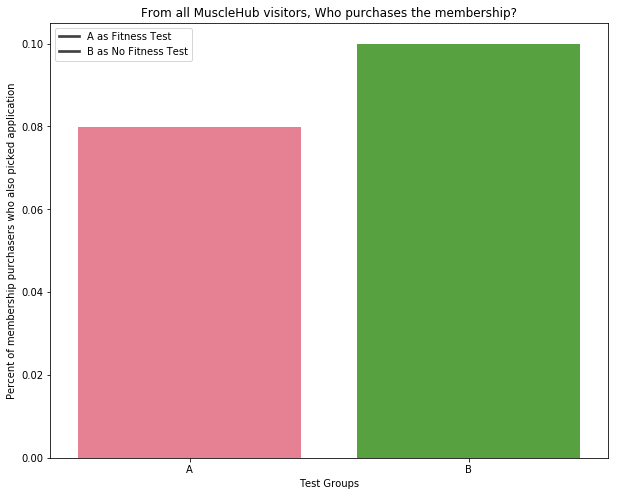

In [51]:
#funnel analysis from visitors to membership purchasers
plt.figure(figsize = (10,8))
sns.barplot(data=final_member_pivot, x="ab_test_group", y="percent_member").set(
    xlabel='Test Groups', 
    ylabel='Percent of membership purchasers who also picked application'
)
plt.title("From all MuscleHub visitors, Who purchases the membership?")
plt.legend(["A as Fitness Test", "B as No Fitness Test"])
sns.set_palette("husl",3)
sns.color_palette("husl")
plt.savefig("Percentage of membership purchase from visitors.png")
plt.show()